## 간단한 컨브넷 밑바닥 부터 훈련시키기
- 개 vs 고양이 분류 컨브넷 정의

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 네트워크 구성
from keras import layers
from keras import models

model = models.Sequential()

# 입력 특성 맵에 적용 할 필터 수 : 32, 윈도우 사이즈, 활성화함수, 입력데이터 구격: 150*150, RGB 3채널
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2))) # 최대 풀링 연산 적용할 윈도우 사이즈 - 다운 샘플링(크기 축소)

model.add(layers.Conv2D(64, (3,3), activation='relu'))# 필터 수 : 128개, 윈도우 사이즈 :
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈

model.add(layers.Conv2D(128, (3,3), activation='relu'))# 필터 수 : 128개, 윈도우 사이즈 :
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈

model.add(layers.Conv2D(128, (3,3), activation='relu')) # 필터 수 : 128개, 윈도우 사이즈 :
model.add(layers.MaxPooling2D((2,2))) # 윈도우 사이즈
          # 여기까지 합성곱 기반 층(지역 패턴 추출 층)

# 여기서 부터 완전 연결 층(전역 패턴 추출, 분류기)
model.add(layers.Flatten()) # 1차원 텐서(벡터)로 변환
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [3]:
# 모델 컴파일
from keras import optimizers

# 정답 분포가 있을텐데 그거랑 현재 예측한 분포랑 
# loss차이를 줄여가는 방식으로 개선
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.adam_v2.Adam(learning_rate = 0.001),
    metrics=['acc']
)

In [4]:
# 데이터 전처리
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) # 스케일 1/255로 조정, 부동소수점 형태로 변환
test_datagen = ImageDataGenerator(rescale =1./255) # 스케일 조정

train_generator = train_datagen.flow_from_directory(
    '/Users/user/cats_and_dogs_small/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

valid_generator = test_datagen.flow_from_directory(
    '/Users/user/cats_and_dogs_small/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# 모델 훈련

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,   # 20 * 100 = 총 훈련 데이터 갯수
    epochs = 30,        
    validation_data = valid_generator,  
    validation_steps = 50   # 소묶음을 50개 넣어보고 fit 해본다.
)
# epoch 의미 : train data를 몇 번 검사할 것인가

# 위에서 batch_size = 20이라 지정,
# batch_size = 20 이므로 한개 batch안에 소묶음이 20개가 들어간다.

# steps per epoch : 한 epoch 당 batch가 몇개 들어갈 것이냐를 의미
# steps per epoch : 100 이라고 하면, 한 epoch 당 batch가 100개있다.


C:\Users\user\AppData\Local\Temp\ipykernel_4496\1555175540.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 38s 374ms/step - loss: 0.6960 - acc: 0.5105 - val_loss: 0.6917 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 33s 332ms/step - loss: 0.6941 - acc: 0.5165 - val_loss: 0.6917 - val_acc: 0.5300
Epoch 3/30
100/100 [==============================] - 33s 327ms/step - loss: 0.6941 - acc: 0.5170 - val_loss: 0.6912 - val_acc: 0.5710
Epoch 4/30
100/100 [==============================] - 34s 335ms/step - loss: 0.6953 - acc: 0.5175 - val_loss: 0.6922 - val_acc: 0.5280
Epoch 5/30
100/100 [==============================] - 33s 330ms/step - loss: 0.6827 - acc: 0.5585 - val_loss: 0.6695 - val_acc: 0.6170
Epoch 6/30
100/100 [==============================] - 34s 336ms/step - loss: 0.6706 - acc: 0.5820 - val_loss: 0.6714 - val_acc: 0.5860
Epoch 7/30
100/100 [==============================] - 34s 345ms/step - loss: 0.6341 - acc: 0.6540 - val_loss: 0.6516 - val_acc: 0.6330
Epoch 8/30
100/100 [==============================] - 3

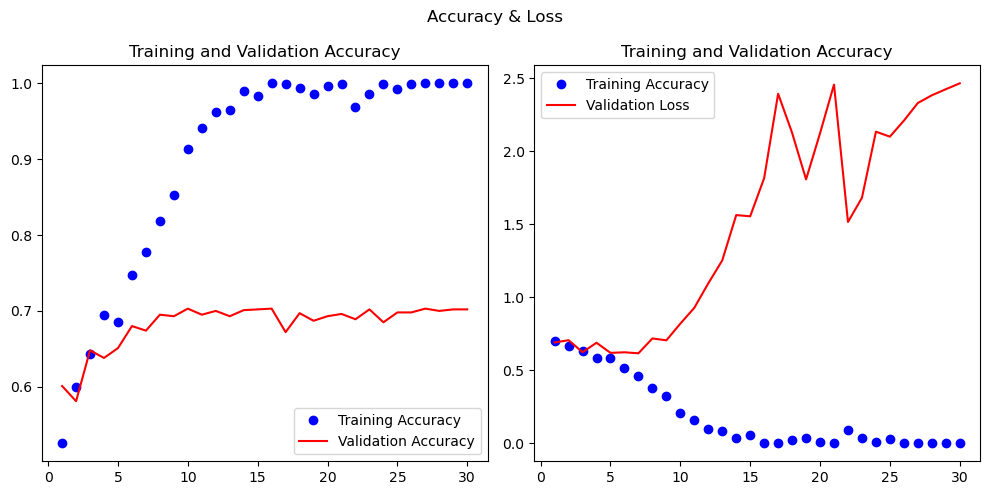

In [11]:
# 훈련 및 검증 정확도, 훈련 및 검증 손실 시각화
acc = history.history['acc']    #모델 fitting 결과를 history에 담아놨다. dictionary 형태로 나옴. 그 중에 accuracy에 해당하는 키와 그에 해당하는 값
val_acc = history.history['val_acc']    #모델 fitting 결과에서 val_acc의 값
loss = history.history['loss']          #모델 fitting 결과에서 loss의 값
val_loss = history.history['val_loss']  #모델 fitting 결과에서 val_loss의 값
                                        #그러므로 이 4개의 값은 list를 담고 있다.

epochs = range(1, len(acc)+1)       # epochs안에 epoch을 몇번 돌았는지 값을 넣어줌, 파이썬은 1부터 시작이라 +1

## 시각화 코드
#figure = 그림을 그릴 건데 그림의 전체 사이즈를 지정해줌(5,5), (20,10),...
plt.figure(figsize=(10,5))

# subplot가로로 선을 하나 긋는다.세로로 선을 두개 긋는다. 그 교차점 중에서 첫번째꺼 하나, 그 위치에 그림을 그리겠다.
# 그림 여러개를 한번에 그릴때 그림 위치를 지정해주는 것
plt.subplot(1,2,1)

# plot(x좌표들, acc=epochs 갯수만큼(30개) 이게 y좌표, bo = 파란점을 찍어라, 범례에 넣을 글 )
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
# legend 범례
plt.legend()

# 데이터가 많을 수록 머신러닝 학습이 잘된다
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.suptitle('Accuracy & Loss')
plt.tight_layout()

plt.show()

## Training Accuracy와 Validation Loss가 차이 날 수록 과적합이 일어났다.
# Overfitting이 일어났따.
## => 훈련데이터를 늘려서 성능을 올리자 => 데이터 증식하자

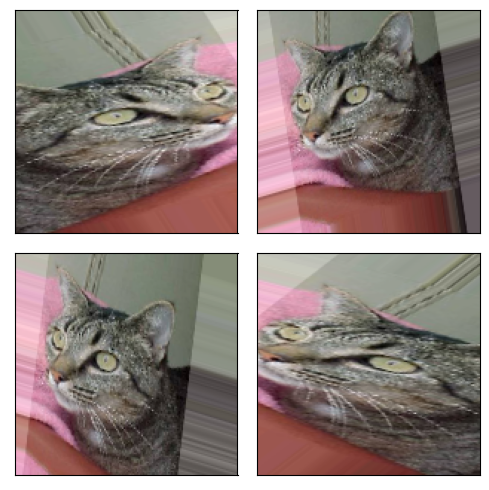

In [23]:
# 데이터 증식
## Overfitting(과적합)이 일어나는 것을 줄이기 위해
### noise 주는 것이랑 비슷해 보인다.

# 고양이 데이터 증식을 위해서 imageDataGenerator를 사용
datagen = ImageDataGenerator(
    rotation_range=30, # 회전을 몇 도 시킬 건가
    width_shift_range=0.1, # 수평으로 평행이동 정도
    height_shift_range = 0.1, # 수직으로 평행이동 정도
    shear_range = 0.2, # y축 방향으로 각도 증가
    zoom_range = 0.5, # 확대 / 축소 범위
    horizontal_flip = True, # 좌우 대칭
    fill_mode = 'nearest'   # 수직으로 평행이동 시켰다고 할 때, 빈 fixel 들을 무엇으로 채울까, 
                            # nearest를 지정하면 가장 가까운 fixel들로 자동으로 채워줌 그래서 결과 이미지가 좀 늘어나보임 
)

# 데이터 증식 결과 시각화해서 살펴보기

import os
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
# from keras.utils import load_img
# from keras.utils import img_to_array
# from keras.utils import array_to_img

# list 축약식
# cats폴더 안의 하부 폴더의 이미지 파일을 listdir를 하면 하나씩 뽑아라 그걸 for문으로 하나씩 불러옴
# fnames = 이미지 주소들을 담고 있는 정렬된 배열
fnames = sorted([os.path.join('/Users/user/cats_and_dogs_small/train/cats', fname) for fname in os.listdir('/Users/user/cats_and_dogs_small/train/cats')])
# 7번째 이미지 주소
img_path = fnames[7]

# 7번째 이미지를 (150,150) 사이즈로 담아온다.
img = load_img(img_path, target_size = (150, 150)) # 이미지 읽어오기, 크기 150 * 150으로 변환

x = img_to_array(img) # (150, 150, 3) 크기 넘파이 배열(텐서)로 변환
x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 으로 변환(배치 차원 추가)

plt.figure(figsize=(5, 5))
i = 1
for batch in datagen.flow(x, batch_size = 1):
    plt.subplot(2, 2, i) # i 번째 이미지
    imgplot = plt.imshow(array_to_img(batch[0]))
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i == 5: break

# 그림 4개를 그린 다음에 배치가 엉성하게 되는데 그거를 방지해줌.
plt.tight_layout()
plt.show()

커브넷에 드롭아웃 층 추가해서 과대적합 억제하기

In [29]:
# 드롭아웃 포함한 새로운 커브넷 정의
# dropout = 랜덤하게 이미지를 탈락시켜서 overfitting 과적합 방지
# 각 픽셀 값들을 랜덤하게 0으로 만듦. -> 너무 디테일한 부분을 지워버림
# 과적합 방지가 됨.
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
# 합성곱 기반 층
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #랜덤하게 절반만큼 특성 값0으로 만든다(드롭아웃)

# # 완전 연결 분류기
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

컨브넷에 드롭아웃 층 추가해서 과대적합 억제하기 – 모델 컴파일 및 데이터 준비하기


In [ ]:
# 모델 컴파일
model.compile(
    loss = 'binary_crossentropy',
    metrics = ['acc'],
    optimizer = optimizers.adam_v2.Adam(lr = 0.001)
)

# 데이터 증식 & 전처리
train_datagen = ImageDataGenrator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.1,
    height_shift_range = 0.4,
    zoom_range = 0.5,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    '/Users/user/cats_and_dogs_small/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

valid_generator = test_datagen.flow_from_directory(
    '/Users/user/cats_and_dogs_small/test',
    target_size = (150,150),
    batch_size=20,
    class_mode = 'binary'
)

모델 훈련시키고 저장하기

In [ ]:
# 모델 훈련
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 100,
    validation_data = valid_generator,
    validation_steps = 50
)
# 모델 저장
model.save('/Users/user/models_saved/cats_and_dogs_not_augmented..h5')

### 컨브넷 학습 시각화
### 활성화 시각화
- 합성곱 층 출력에 요소 별로 활성화 함수 적용한 결과를 ‘활성화’ 라고 한다.
-  이 활성화를 시각화 해서, 각 층의 의미(역할)를 직접 눈으로 확인할 수 있다.

앞에서 학습 시킨 모델 로드하기

In [30]:
from keras.models import load_model

# 저장한 작은 컨브넷 로드

model2 = load_model('/Users/user/models_saved/cats_and_dogs_not_augmented.h5')
model2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000018A409EC430>>

In [39]:
img_path='/Users/user/San.png'


# from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import array_to_img

img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


## 컨브넷 학습 시각화
## 활성화 시각화
- CNN층에서 층을 쌓아 놨는데 층마다 출력이 있을 것이다.
- 그 출력을 다음층의 입력으로 넣는 것인데
- 그 층마다의 출력을 시각화해서 보고싶다.

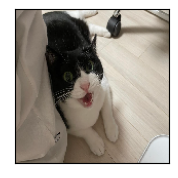

In [40]:
# 원본 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(img_tensor[0])
plt.xticks([])  # x축 좌표들을 없애라
plt.yticks([]) # y축 좌표들을 없애라, 깔끔하게 이미지만 출력하고 싶어서
plt.show()

In [44]:
# 상위 8개 레이어 출력만 추출
from keras import models
layer_outputs = [layer.output for layer in model2.layers[:8]]

# 특정 입력에 대한 출력 매핑하는 모형
activation_model = models.Model(inputs = model2.input, outputs=layer_outputs)
#하나의 입력에 대해 : 8개 출력 대응된다(총 8개 출력 결과)

# 예측 모드로 모델 실행하기
activations = activation_model.predict(img_tensor) # img_tensor 1개 입력에 대해: 8개 층 각각에 통과시켜서 그 출력 반환

1/1 [==============================] - 0s 89ms/step


(1, 148, 148, 32)


<Figure size 200x200 with 0 Axes>

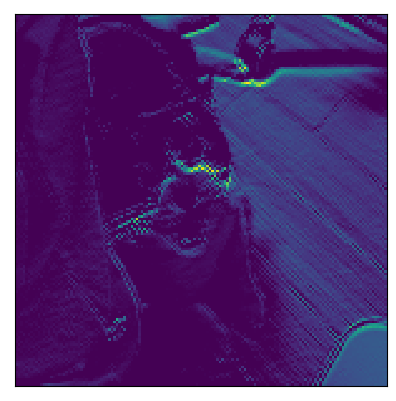

In [54]:
# 합성곱 층들의 가장 밑단을 볼 수 있다.
# 첫번째 합성곱 층 활성화 맵 시각화
first_layer_activation_result = activations[0]
print(first_layer_activation_result.shape) # 활성곱 결과 : 높이148, 너비 148, 배치1, 필터 적용한 응답 맵 32개

# 응답 맵 32개 중 24번째 응답 맵 시각화
# 원래 이미지가 있었으면 필터가 지나 갔을 거다 총 32개 필터
# 필터 중 21번째가 지나갔을 때 출력해라
plt.figure(figsize=(2,2))
plt.matshow(first_layer_activation_result[0,:,:,24], cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.show()